In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

tensor([-25.], device='cuda:0') tensor(168.0726, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(100.4928, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(51.0788, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(18.7899, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(2.6272, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.6316, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(14.8828, device='cuda:0', dtype=torch.float64)


/home/jp/miniforge3/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


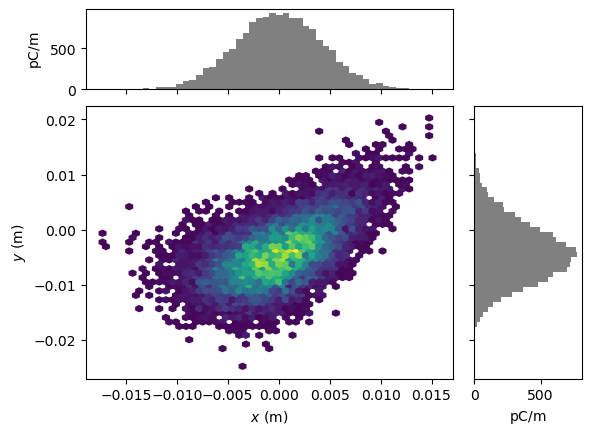

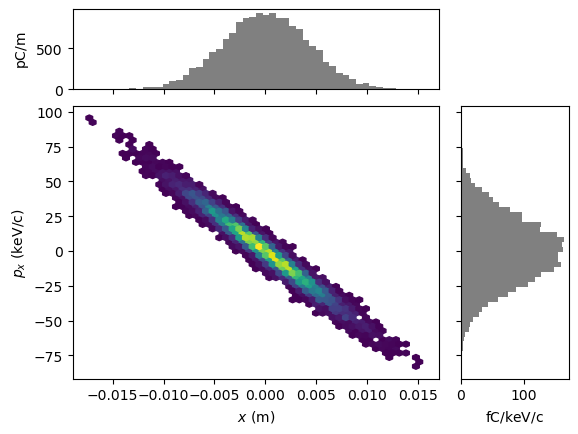

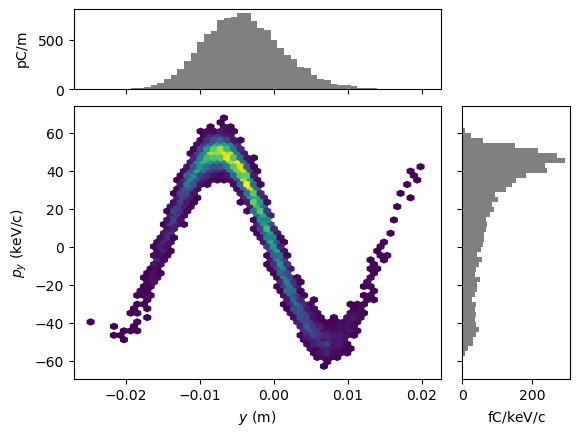

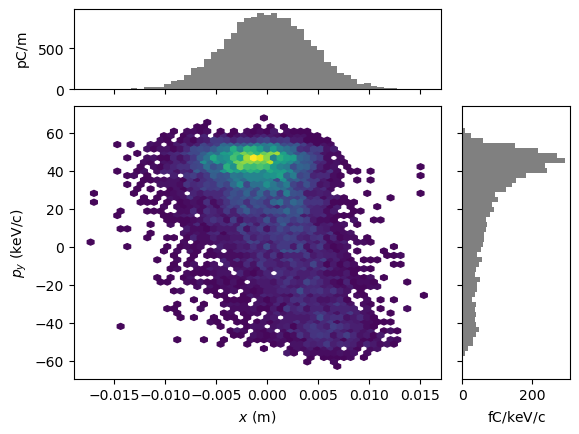

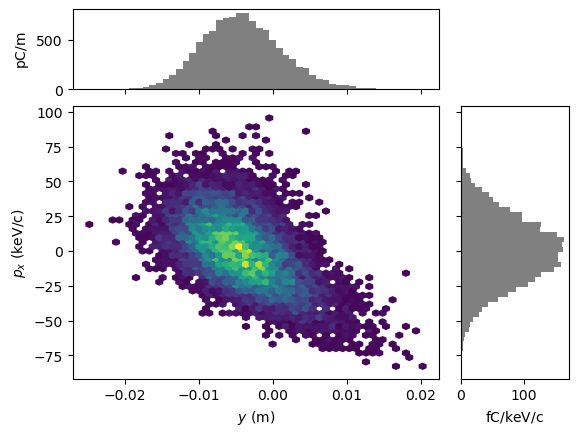

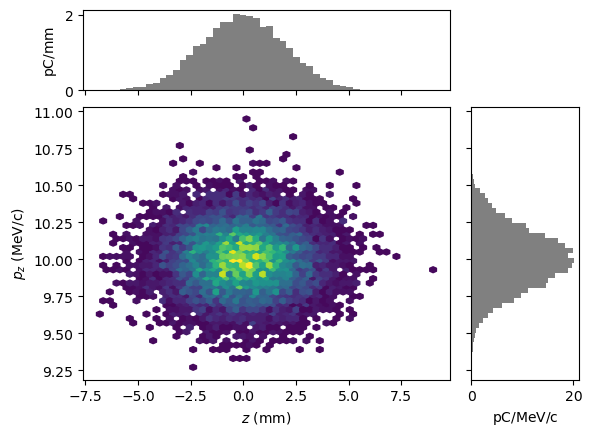

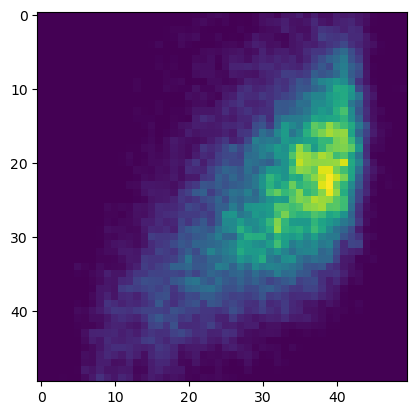

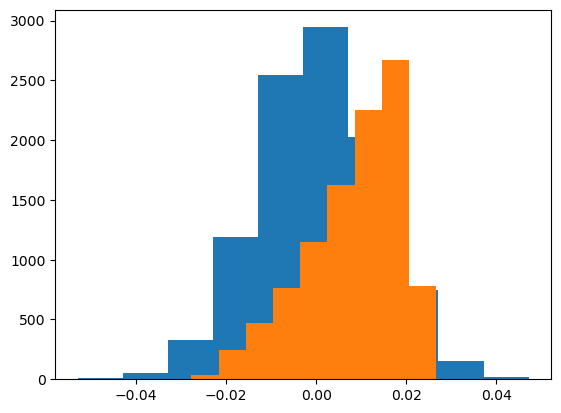

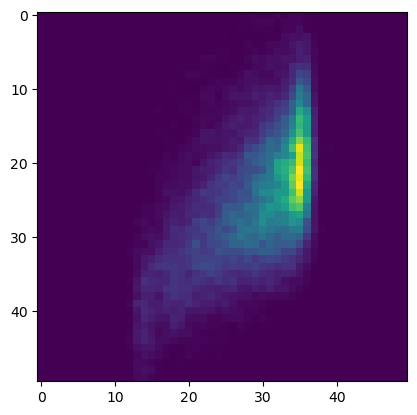

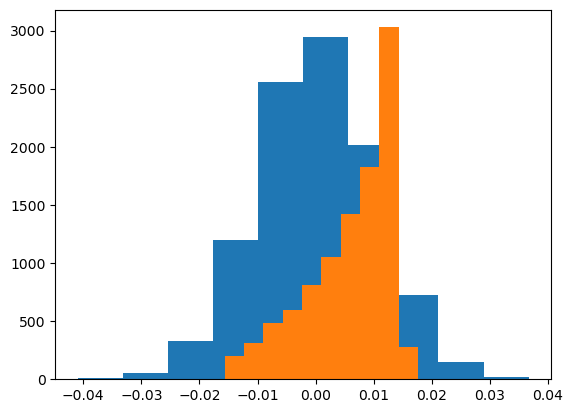

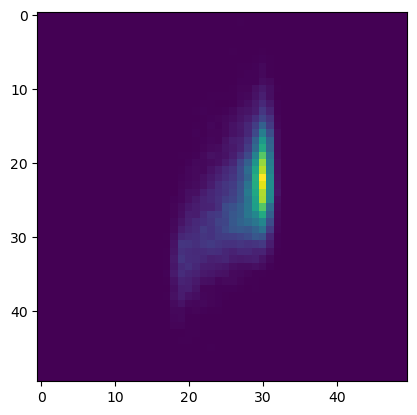

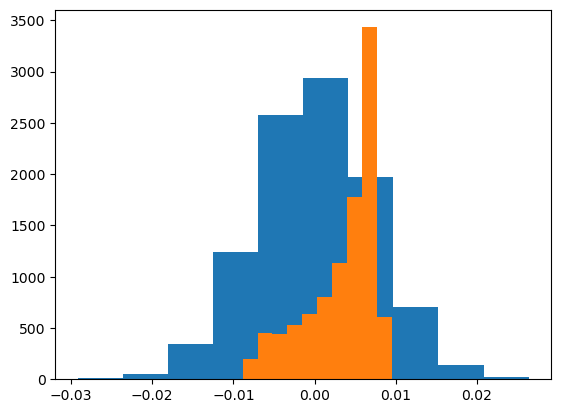

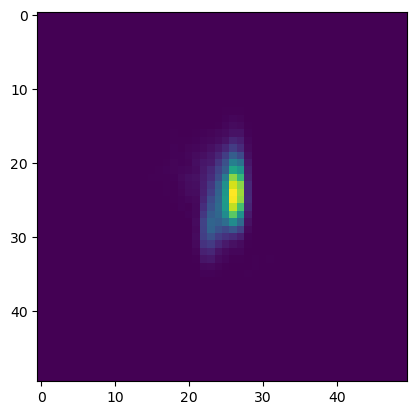

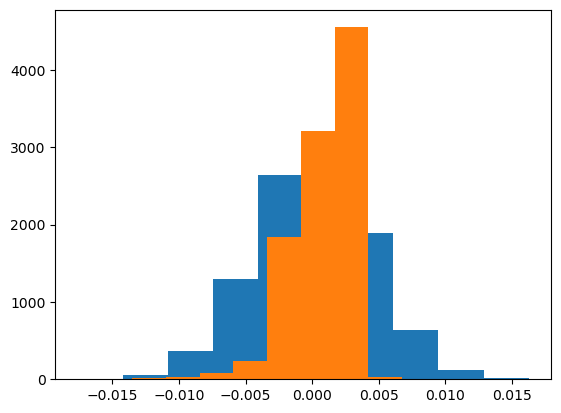

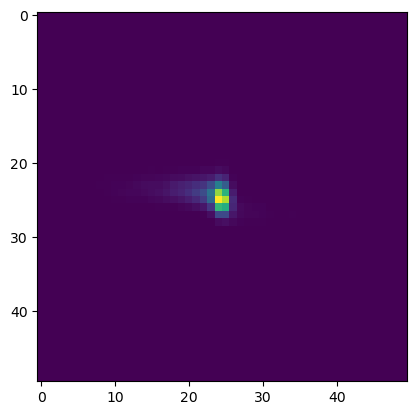

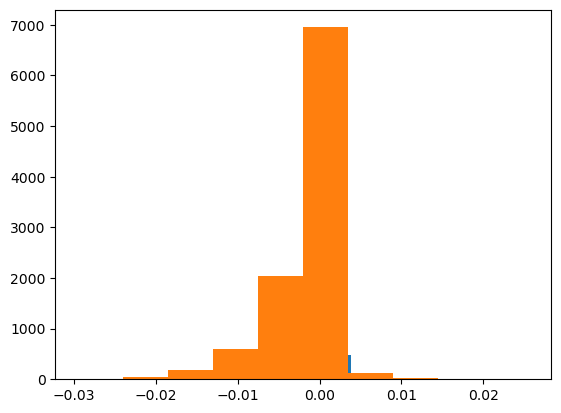

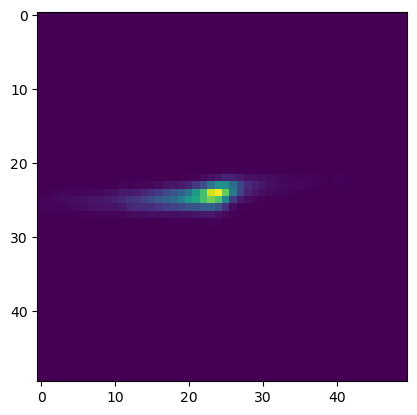

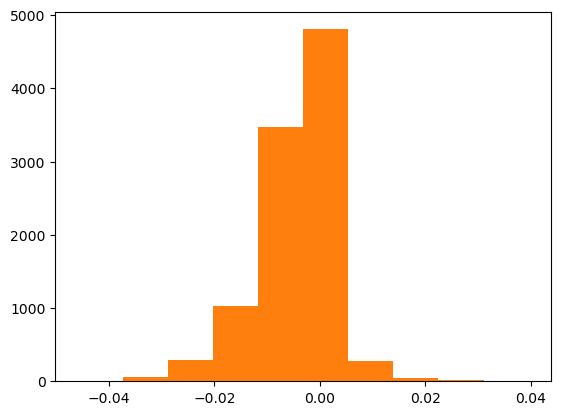

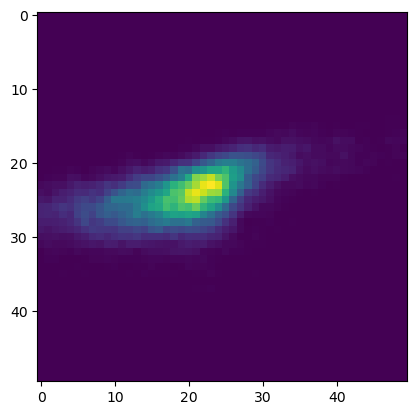

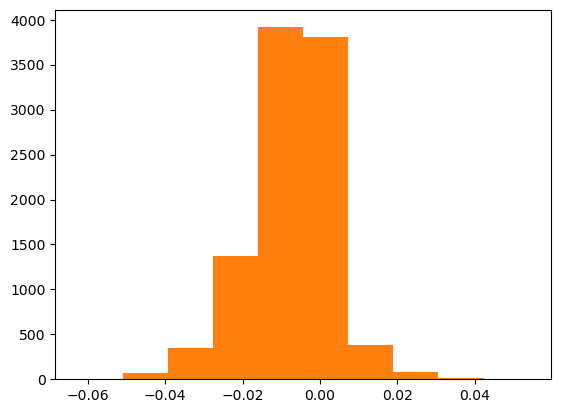

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.117283440682738e-05
beta 2.6060110126080804
alpha 1.022161316998061
gamma 0.7846527693375989


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.0074842521095488e-06
beta 8.967343161522164
alpha 4.978971694453879
gamma 2.8760089437455156


In [6]:
beam_coords.shape

torch.Size([10000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0012)

(array([2.400e+01, 2.060e+02, 1.060e+03, 2.552e+03, 3.257e+03, 2.057e+03,
        7.190e+02, 1.080e+02, 1.400e+01, 3.000e+00]),
 array([-0.07303049, -0.05624873, -0.03946696, -0.0226852 , -0.00590343,
         0.01087833,  0.0276601 ,  0.04444186,  0.06122363,  0.0780054 ,
         0.09478716]),
 <BarContainer object of 10 artists>)

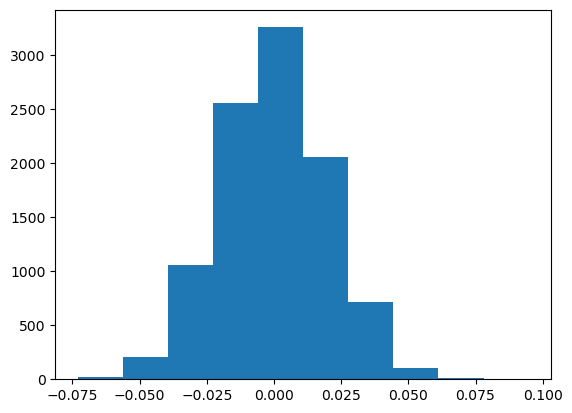

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())

In [10]:
from dev.minimal_example.fitting import train_single_model

0 tensor(62990252., device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(6793969., device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(4777843., device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(4462834.5000, device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(4996177.5000, device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(3641490., device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(3525522.7500, device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(3500256.2500, device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(4117478.5000, device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(4451388., device='cuda:0', grad_fn=<MulBackward0>)


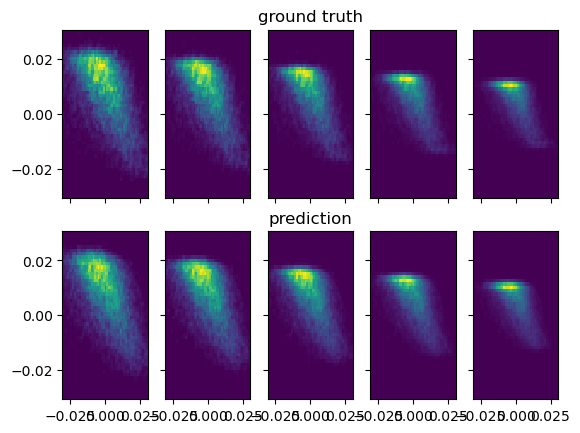

In [11]:
train_single_model()